# Dataset import and exploration
- https://www.kaggle.com/shelvigarg/wine-quality-dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app

Mounted at /content/gdrive


In [2]:
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [3]:
%cd /app

/content/gdrive/My Drive


In [4]:
import numpy as np
import pandas as pd 

df = pd.read_csv('/app/data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1102,white,6.3,0.16,0.40,1.6,0.033,59.0,148.0,0.99140,3.44,0.53,11.4,5
2811,white,7.4,0.30,0.32,1.7,0.030,23.0,128.0,0.99290,3.17,0.66,10.9,5
5237,red,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
4165,white,6.6,0.22,0.35,1.4,0.050,23.0,83.0,0.99019,3.17,0.48,12.0,7
1546,white,6.7,0.29,0.49,4.7,0.034,35.0,156.0,0.99450,3.13,0.45,9.9,6


In [5]:
df.shape

(6497, 13)

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Drop missing values:

In [7]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Encode string data:

In [8]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [9]:
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### All data is numeric now:

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_white_wine             int64
dtype: object

<br>

# Convert to a binary classification problem
- This is not a binary classification problem by default
- We can make it one by declaring wines above some quality point good wines and rest of them bad wines

In [11]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

- So we'll have 63.3% good wines and the rest are bad

In [12]:
len(df[df['quality'] >= 6]) / len(df)

0.6329877765743462

In [13]:
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [14]:
df['is_good_wine'].value_counts()

1    4091
0    2372
Name: is_good_wine, dtype: int64

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


<br>

# Train/Test split

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [17]:
X_train.shape, X_test.shape

((5170, 12), (1293, 12))

In [18]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine
459,6.1,0.43,0.35,9.1,0.059,83.0,249.0,0.99710,3.37,0.50,8.500000,1
1460,8.5,0.17,0.74,3.6,0.050,29.0,128.0,0.99280,3.28,0.40,12.400000,1
4403,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,1
3828,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.300000,1
4317,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.200000,1


<br>

# Data scaling
- Input features aren't on the same scale, so we'll fix it quickly:

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled[:3]

array([[-0.86265684,  0.56588915,  0.22079121,  0.75048207,  0.07674805,
         2.9415276 ,  2.35882933,  0.788386  ,  0.94784355, -0.20357893,
        -1.66472797,  0.57094748],
       [ 0.99186667, -1.02945526,  2.92098728, -0.3929423 , -0.17512717,
        -0.08344183,  0.21383119, -0.64578381,  0.38700578, -0.87653487,
         1.63149383,  0.57094748],
       [-1.55810316, -0.72265826,  0.98238498,  0.14758559,  0.27265101,
         0.5887736 ,  1.25973937, -0.37229096, -0.17383198, -0.74194369,
        -0.62233304,  0.57094748]])

<br>

# Model training

In [21]:
import tensorflow as tf

- This is a completely random neural network architecture
- Use `sigmoid` as the activation function in the last layer when working with binary classification problems
- Use `binary_crossentropy` as a loss function when working with binary classification problems
- We'll track accuracy, precision, and recall and train for 100 epochs

In [22]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
162/162 [==============================] - 5s 5ms/step - loss: 0.6092 - accuracy: 0.7219 - precision: 0.7594 - recall: 0.8220
Epoch 2/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5274 - accuracy: 0.7366 - precision: 0.7649 - recall: 0.8442
Epoch 3/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5169 - accuracy: 0.7453 - precision: 0.7708 - recall: 0.8518
Epoch 4/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5133 - accuracy: 0.7617 - precision: 0.8033 - recall: 0.8268
Epoch 5/100
162/162 [==============================] - 1s 6ms/step - loss: 0.5199 - accuracy: 0.7551 - precision: 0.7917 - recall: 0.8332
Epoch 6/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5042 - accuracy: 0.7528 - precision: 0.7880 - recall: 0.8351
Epoch 7/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5122 - accuracy: 0.7549 - precision: 0.7903 - recall: 0.8354
Epoch 8/100
162/162 [=============

<br>

# Model performance visualization

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

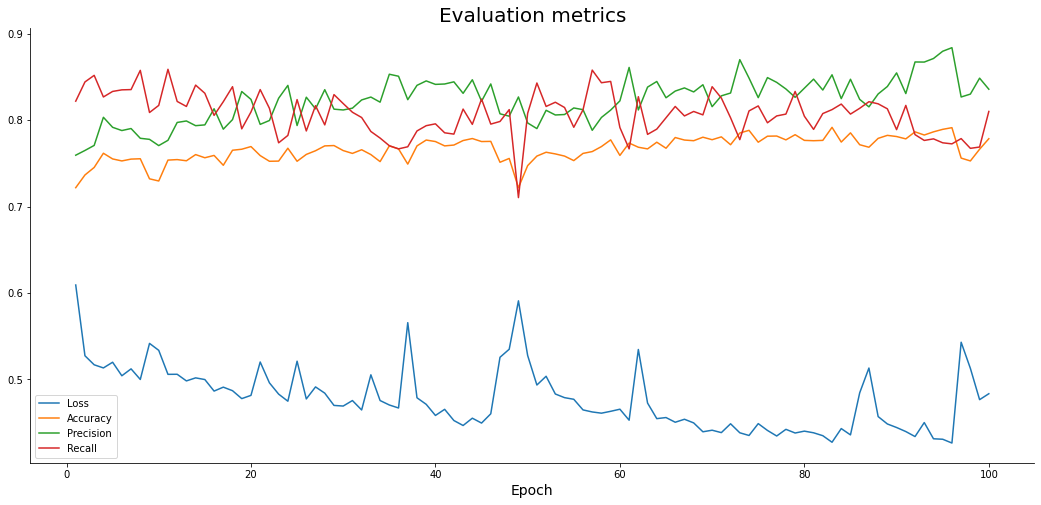

In [24]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

- You could keep training the model, as accuracy, precision, and recall seem to grow slightly

<br>

# Making predictions

In [25]:
predictions = model.predict(X_test_scaled)
predictions

array([[0.63926464],
       [0.60534483],
       [0.7147916 ],
       ...,
       [0.95940924],
       [0.22377399],
       [0.22377399]], dtype=float32)

- These are probabilities - here's how to convert them to classes (threshold = 0.5)

In [26]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print(prediction_classes[:20])

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


<br>

# Model evaluation

- Evaluation on the test set:

In [27]:
loss, accuracy, precision, recall = model.evaluate(X_test_scaled, y_test)
loss, accuracy, precision, recall

41/41 [==============================] - 1s 4ms/step - loss: 0.5127 - accuracy: 0.7703 - precision: 0.8067 - recall: 0.8335


(0.5126680731773376, 0.7703016400337219, 0.8066825866699219, 0.833538830280304)

In [28]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[320 162]
 [135 676]]


- 383 True Negatives, 597 True positives, 214 False negatives, 99 False positives
- Further evaluation:

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy:  {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall:    {recall_score(y_test, prediction_classes):.2f}')

Accuracy:  0.77
Precision: 0.81
Recall:    0.83
